In [5]:
# load the necessary packages  
import time
start_time = time.time() 
import numpy as np    
import pandas as pd  
import scipy.stats as stats 
from scipy.stats import zscore 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns  
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
import math 
from collections import Counter
random_state = np.random.RandomState(0) 
import warnings 
warnings.filterwarnings('ignore')

In [6]:
# Part A
# Domain: Medical 

In [7]:
# Part A 1(A) 
# Read all the 3 CSV files as DataFrame and store them into 3 separate variables.
# Solution 
Normal = pd.read_csv('Normal.csv')
Normal_New = pd.DataFrame(Normal)
Type_H = pd.read_csv('Type_H.csv') 
Type_H_New = pd.DataFrame(Type_H)
Type_S = pd.read_csv('Type_S.csv')
Type_S_New = pd.DataFrame(Type_S)

In [8]:
# Part A 1(B)
# Print Shape and columns of all the 3 DataFrames.
# Solution 
Normal_New.shape

(100, 7)

In [9]:
Type_H_New.shape

(60, 7)

In [10]:
Type_S_New.shape

(150, 7)

In [11]:
Normal_New.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [12]:
Type_H_New.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [13]:
Type_S_New.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [14]:
# Part A 1(C)
# Compare Column names of all the 3 DataFrames and clearly write observations.
# Method 1
set(Normal_New.columns).intersection(set(Type_H_New.columns))   

{'Class',
 'L_angle',
 'P_incidence',
 'P_radius',
 'P_tilt',
 'S_Degree',
 'S_slope'}

In [15]:
set(Normal_New.columns).intersection(set(Type_S_New.columns)) 

{'Class',
 'L_angle',
 'P_incidence',
 'P_radius',
 'P_tilt',
 'S_Degree',
 'S_slope'}

In [16]:
set(Type_H_New.columns).intersection(set(Type_S_New.columns)) 

{'Class',
 'L_angle',
 'P_incidence',
 'P_radius',
 'P_tilt',
 'S_Degree',
 'S_slope'}

In [17]:
# Method 2 
# Columns in Normal_New not in Type_H_New 
Normal_New.columns.difference(Type_H_New.columns)  

Index([], dtype='object')

In [18]:
# The empty result shows that there are no differences in columns between Normal_New and Type_H_New  

In [19]:
# Columns in Normal_New not in Type_S_New 
Normal_New.columns.difference(Type_S_New.columns)

Index([], dtype='object')

In [20]:
# The empty result shows that there are no differences in columns between Normal_New and Type_S_New  

In [21]:
# Columns in Type_H_New not in Type_S_New  
Type_H_New.columns.difference(Type_S_New.columns)

Index([], dtype='object')

In [22]:
# The empty result shows that there are no differences in columns between Type_H_New and Type_S_New  

In [23]:
#Both methods 1 and 2 showed that there are no differences in column names in the three data frames viz, Normal_New, Type_H_New and Type_S_New 

In [24]:
# Part A 1(D)
# Print DataTypes of all the 3 DataFrames.
# Solution
Normal_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [25]:
Type_H_New.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [26]:
Type_S_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [27]:
# Part A 1(E)  
# Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.
Normal_New ['Class'].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [28]:
Type_H_New ['Class'].unique()

array(['Type_H', 'type_h'], dtype=object)

In [29]:
Type_S_New ['Class'].unique()

array(['Type_S', 'tp_s'], dtype=object)

In [30]:
# Observations    
#'Class' feature in the 3 Dataframes has 6 unique elements namely 'Normal', 'Nrmal', 'Type_H', 'type_h' 'Type_S', 'tp_s'.
# Of the 6, three are discrepants. The discrepancy may have emanated at the time of inputting the data. 
# This calls for a data cleaning exercise. 

In [31]:
# Part A 2(A)
# Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [32]:
# Solution
# Observed inconsistency in Class inputs. Ideally, there should have been 3 classes viz,'Normal', 'Type_H', 'Type_S'
# This warranted a data cleaning exercise. Cleaned data is stored in file "Class"  
Class = pd.read_csv('Class.csv')
Class_New = pd.DataFrame(Class)
Class_New.Class.unique() 

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [33]:
# Post data cleaning exercise, the elements viz, 'Nrmal','type_h' and 'tp_s' are removed from the Class feature of the 3 Dataframes

In [34]:
# Part A 2(B)
# Combine all the 3 DataFrames to form a single DataFrame
# Solution
frames= [Normal_New,Type_H_New,Type_S_New] 
dataframe_New = pd.concat (frames,ignore_index=True)
dataframe_New

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [35]:
dataframe_New.shape 

(310, 7)

In [36]:
# Part A 2(C)
# Print 5 random samples of this DataFrame
# Solution 
df = pd.DataFrame(dataframe_New)
df1 = df.sample(n=5, random_state=0) 
df1   

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
300,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706,Type_S
145,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
302,76.314028,41.933683,93.284863,34.380345,132.267286,101.218783,Type_S
222,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,Type_S
52,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,Normal


In [37]:
# Part A 2(D)
# Print Feature-wise percentage of Null values. 
# Solution
dataframe_New.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [38]:
# There are no Null values for any feature. Hence, percentage of Null values for each feature is Zero. 

In [39]:
# Part A 2(E)
# Check 5-point summary of the new DataFrame
# Solution
dataframe_New.describe(exclude=['object']) 

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [40]:
# Part A 3(A)
# Visualize a heatmap to understand correlation between all features
# Solution
corr = dataframe_New.corr()
corr 

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


<AxesSubplot:>

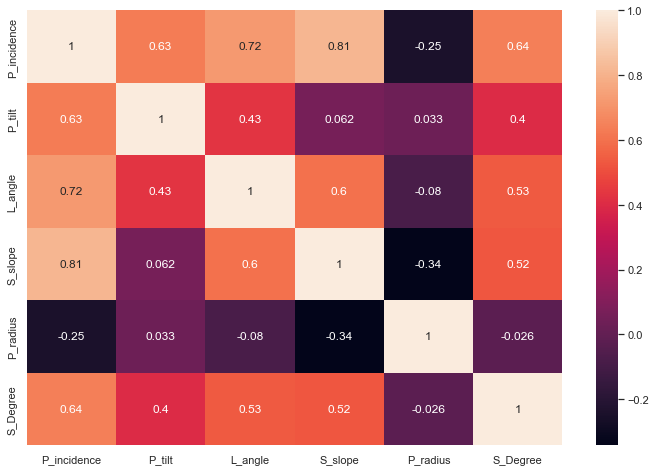

In [41]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(corr, annot=True)    

In [42]:
# Part A 3(B)
# Share insights on correlation. 
# A. Features having stronger correlation with correlation value.
# B. Features having weaker correlation with correlation value.

In [43]:
# Solution
# Features with strong correlation (0.7<correlation coefficient<=1)
# 1. P_incidence and S_slope with a correlation coefficient of 0.81
# 2. P_incidence and L_angle with a correlation coefficient of 0.72

# Features with weak correlation (0.25<correlation coefficient<=0.50)
# 1. P_tilt and L_angle with a correlation coefficient of 0.43
# 2. P_tilt and S_Degree with a correlation coefficient of 0.40 

In [44]:
#  Part A 3(C)
# Visualize a pairplot with 3 classes distinguished by colors and share insights.
dataframe_New.index.is_unique 

True

In [45]:
dataframe_New.Class.unique ()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

In [46]:
# Observed inconsistency in Class inputs. Ideally, there should have been 3 classes. However, due to error in inputting, we have 6 classes.
# This warranted a data cleaning exercise. Cleaned data is stored in file "Class"

In [47]:
Class = pd.read_csv('Class.csv')
Class_New = pd.DataFrame(Class)

In [48]:
Class_New.Class.unique() 

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [49]:
Class_New.shape

(310, 7)

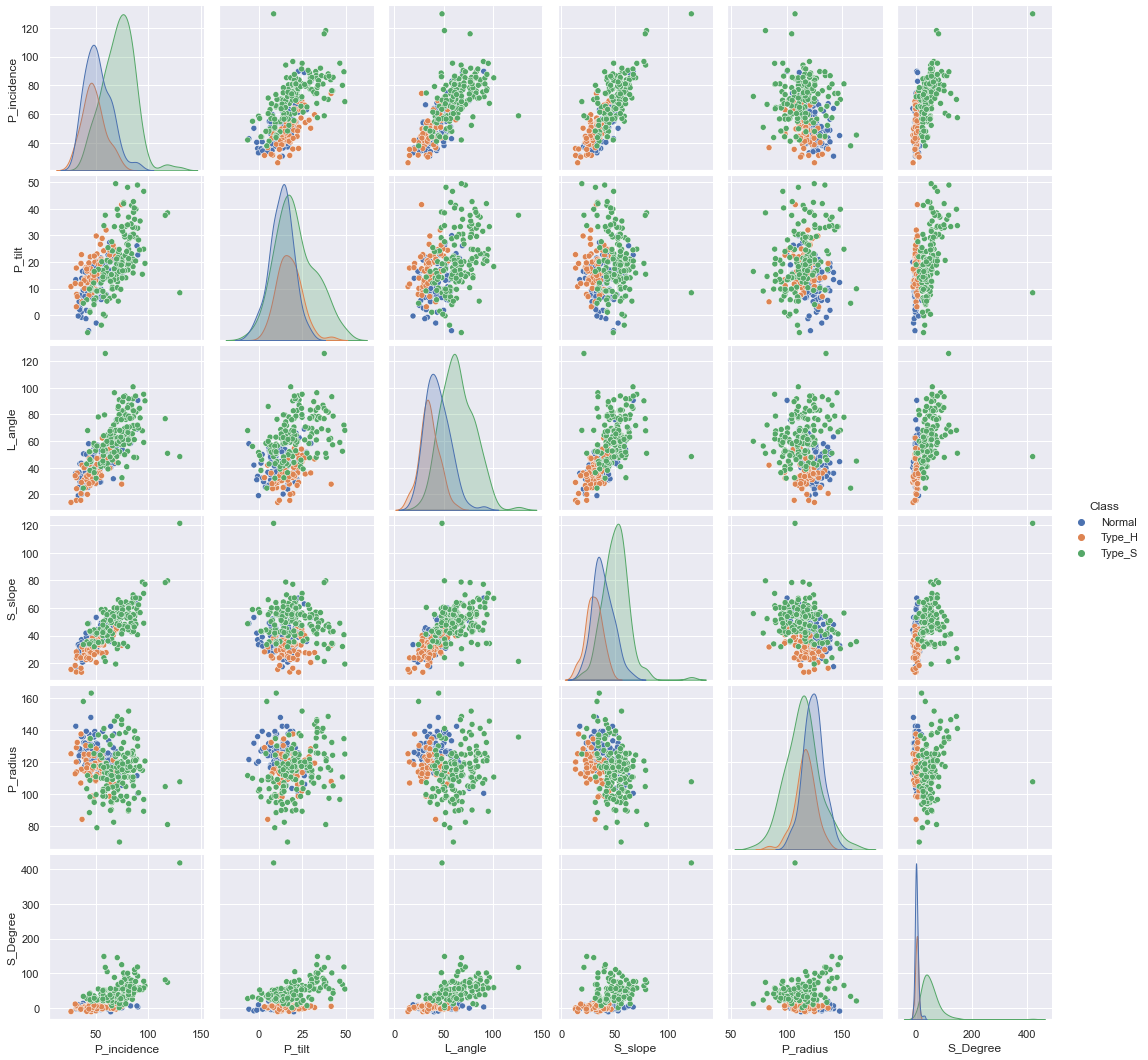

In [50]:
sns.pairplot(Class_New, hue="Class")

In [51]:
# Insights based on pairplot
# 1. There exists no correlation between P_radius and other features 
# 2. There exists no correlation between S_Degree and other features 
# 3. There exists no correlation between S_slope and P_tilt, P_radius and S_degree. However, a positive correlation is found between S_slope and L_angle  
# 4. There exists no correlation between P_radius and L_angle 

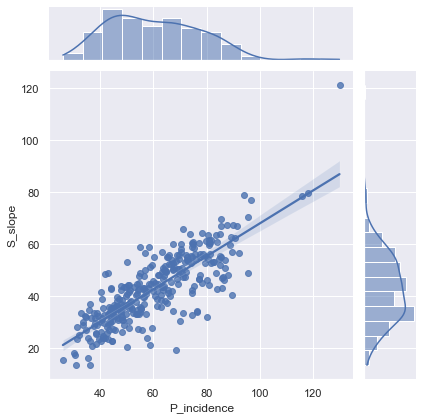

In [52]:
# Part A 3(D)
# Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights
sns.set(font_scale = 1)
sns.jointplot(x="P_incidence", y="S_slope", data=Class_New,kind="reg") 

In [53]:
# Insights based on joint plot 
# 1. A strong positive correlation is seen between P_incidence and S_slope. 
# 2. P_incidence is a right tailed distribution indicating that the peak of the histogram veers to the left. Here, mean > median
# 3. S_slope is also a positively skewed distribution with mean > median 

In [54]:
# Part A 3(E) 
# Visualize a boxplot to check distribution of the features and share insights  

<AxesSubplot:xlabel='P_incidence'>

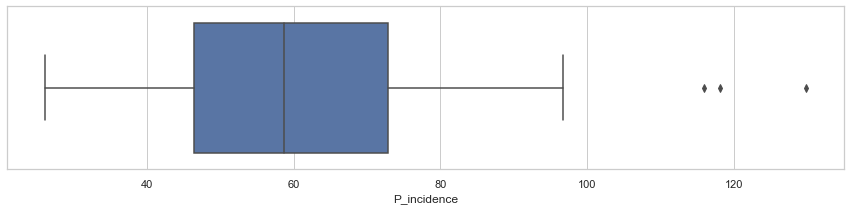

In [55]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Class_New.P_incidence)   

In [56]:
stats.skew(Class_New.P_incidence)

0.5179182448891371

<AxesSubplot:xlabel='P_tilt'>

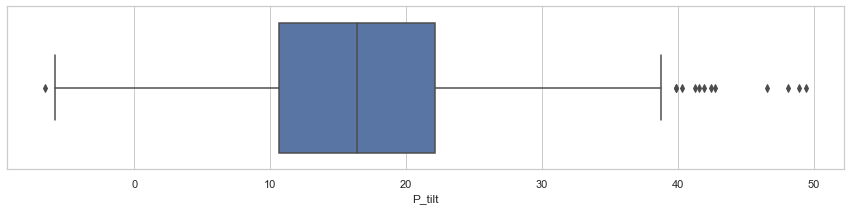

In [57]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Class_New.P_tilt)

In [58]:
stats.skew(Class_New.P_tilt)

0.673275303734576

<AxesSubplot:xlabel='L_angle'>

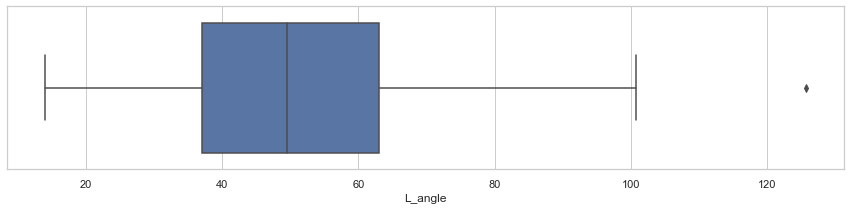

In [59]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Class_New.L_angle)

In [60]:
stats.skew(Class_New.L_angle) 

0.5965469984841169

<AxesSubplot:xlabel='S_slope'>

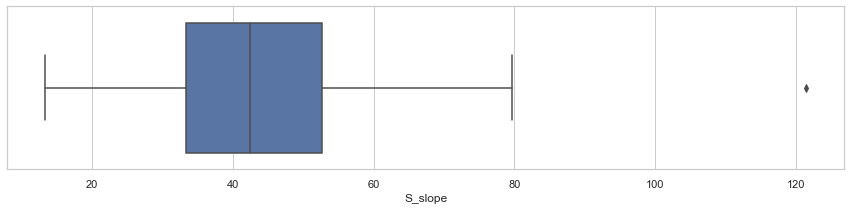

In [61]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Class_New.S_slope)

In [62]:
stats.skew(Class_New.S_slope) 

0.7887364793380615

<AxesSubplot:xlabel='P_radius'>

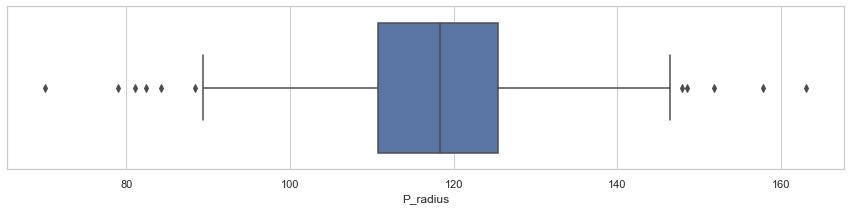

In [63]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Class_New.P_radius)

In [64]:
stats.skew(Class_New.P_radius) 

-0.17597806279183772

<AxesSubplot:xlabel='S_Degree'>

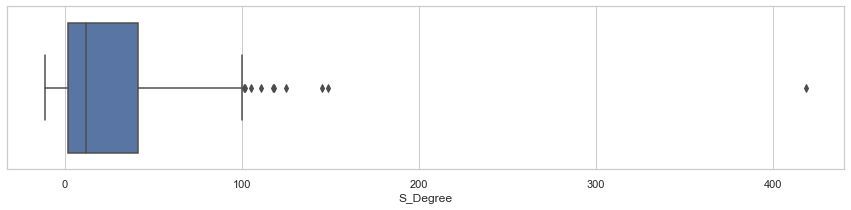

In [65]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Class_New.S_Degree)

In [66]:
stats.skew(Class_New.S_Degree) 

4.297032173926705

<AxesSubplot:xlabel='S_Degree', ylabel='Density'>

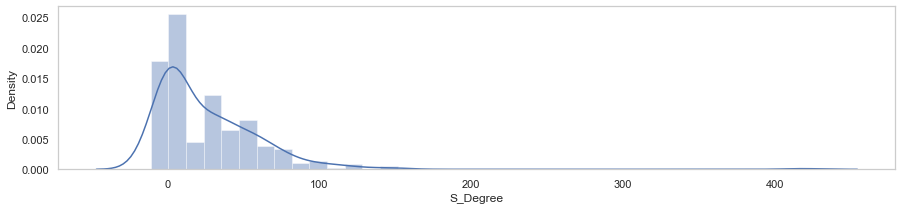

In [67]:
ax = plt.subplots(figsize=(15,3))      
plt.grid(False)
sns.distplot(Class_New.S_Degree)

In [68]:
# Insights based on box plots 
# 1. The distribution of the features viz, P_incidence, P_tilt, L_angle, S_slope, S_Degree are positively skewed. 
# Of them, the highest positive skewness is observed in the case of S_Degree.   
# As compared to other features, for S_Degree, the median is closest to 1st Quartile than to 3rd Quartile. 
# 2. The only exception is P_radius feature which is negatively skewed.    

In [69]:
# Part A 4(A)
# Split data into X and Y
X = Class_New.drop(labels= "Class", axis = 1)
Y = Class_New["Class"]  

In [70]:
Class_New.Class.unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [71]:
# Part A 4(B)
# Split data into train and test with 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

In [72]:
# Part A 4(C)
# Train a Supervised Learning Classification base model using KNN classifier  

In [73]:
# Solution 
# KNN on test data 
# Instantiate base learning model using k = 3
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred = knn.predict(X_test)
# evaluate accuracy 
print(accuracy_score(Y_test, Y_pred))

0.8548387096774194


In [74]:
# Part A 4(D)
# Print all the possible performance metrics for both train and test data.
# Performance metrics for test data 
print(classification_report(Y_test, Y_pred, labels=['Normal', 'Type_H', 'Type_S'])) 

              precision    recall  f1-score   support

      Normal       0.73      0.89      0.80        18
      Type_H       0.78      0.64      0.70        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



Confusion Matrix


<AxesSubplot:>

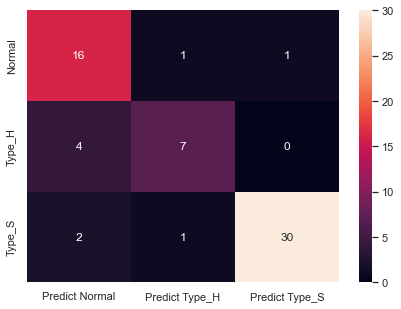

In [75]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, Y_pred, labels=['Normal', 'Type_H', 'Type_S'])
df_cm = pd.DataFrame(cm, index = [i for i in ['Normal', 'Type_H', 'Type_S']],
                  columns = [i for i in ['Predict Normal','Predict Type_H','Predict Type_S']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [76]:
# KNN on training data 
# Instantiate base learning model using k = 3
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred_New = knn.predict(X_train)
# evaluate accuracy
print(accuracy_score(Y_train, Y_pred_New))

1.0


In [77]:
# Performance metrics for training data 
print(classification_report(Y_train, Y_pred_New, labels=['Normal', 'Type_H', 'Type_S']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        82
      Type_H       1.00      1.00      1.00        49
      Type_S       1.00      1.00      1.00       117

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



Confusion Matrix


<AxesSubplot:>

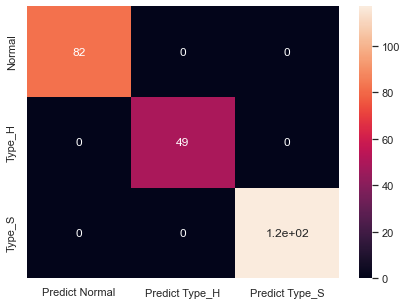

In [78]:
print("Confusion Matrix")
cm1=metrics.confusion_matrix(Y_train, Y_pred_New, labels=['Normal', 'Type_H', 'Type_S'])
df_cm1 = pd.DataFrame(cm1, index = [i for i in ['Normal', 'Type_H', 'Type_S']],
                  columns = [i for i in ['Predict Normal','Predict Type_H','Predict Type_S']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True)

In [79]:
# Observtaion: The KNN model with hyperparatemer, K =3 fits the training data perfectly but underfits the testing data.
# Hence, KNN with K = 3 is an overfit model 

In [80]:
# Part A 5(A)   
# Experiment with various parameters to improve performance of the base model.

In [81]:
# Solution 
# In order to find the optmal K, different values of K are used along with their acuracy.
# Accuracy on test data is computed 

In [82]:
# Base Model 
# Instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(Y_test, Y_pred)) 

0.8548387096774194


In [83]:
# Instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(Y_test, Y_pred))

0.9032258064516129


In [84]:
# Instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(Y_test, Y_pred))

0.8548387096774194


In [85]:
# Instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(Y_test, Y_pred))

0.8548387096774194


In [86]:
# Instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(Y_test, Y_pred))

0.8387096774193549


In [87]:
# Run the KNN with no of neighbours to be 1,3,5..100 and find the optimal number of neighbours using the Mis-classification error
# Misclassification error (MSE) = 1 - Accuracy score. 
# Calculated MSE for each model with neighbours = 1,3,5...100 and find the model with lowest MSE

In [88]:
# creating the list of K for KNN
myList = list(range(1,101))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....100
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    Y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, Y_pred)
    ac_scores.append(scores)
# misclassification error
MSE = [1 - x for x in ac_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


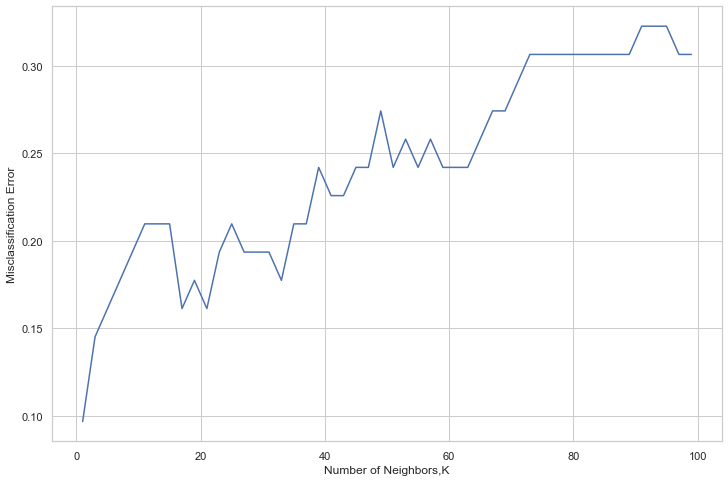

In [89]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors,K')
plt.ylabel('Misclassification Error')
plt.show()

In [90]:
# The lowest misclassification error is observed in the case of k =1 

In [91]:
# Part A 5(B) 
# Clearly showcase improvement in performance achieved. [1 Marks]
# For Example:
# A. Accuracy: +15% improvement
# B. Precision: +10% improvement.

In [92]:
# Solution 
X = Class_New.drop(labels= "Class", axis = 1)
Y = Class_New["Class"]  
# Split data into train and test with 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)      

In [93]:
# Base Model 
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
# Fitting the model
knn.fit(X_train, Y_train)
# predict the response
Y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(Y_test, Y_pred))   

0.8548387096774194


In [94]:
# Performance metrics for test data with K =3 
print(classification_report(Y_test, Y_pred, labels=['Normal', 'Type_H', 'Type_S'])) 

              precision    recall  f1-score   support

      Normal       0.73      0.89      0.80        18
      Type_H       0.78      0.64      0.70        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



In [95]:
# Split data into train and test with 80:20 proportion
# New variables X_train_1, X_test_1, Y_train_1, Y_test_1 are introduced in order to avoid duplication in the clasification report for k=3 ad k=1
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X,Y, test_size=0.20, random_state=1)

In [96]:
# Optimum model 
# Instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
# Fitting the model
knn.fit(X_train_1, Y_train_1)
# predict the response
Y_pred_1 = knn.predict(X_test_1)
# evaluate accuracy
print(accuracy_score(Y_test_1, Y_pred_1))

0.9032258064516129


In [97]:
# Performance metrics for test data with K =1
print(classification_report(Y_test_1, Y_pred_1, labels=['Normal', 'Type_H', 'Type_S'])) 

              precision    recall  f1-score   support

      Normal       0.81      0.94      0.87        18
      Type_H       0.89      0.73      0.80        11
      Type_S       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62



In [98]:
# Comparison between base model and optimal model 
# Inprovement in 
# A. Accuracy score: Base (0.85) and Optimal (0.90) = 5%
# B. Precision score
# 1. Normal: Base (0.73) and Optimal (0.81) = 8%
# 2. Type_H: Base (0.78) and Optimal (0.89) = 11%
# 3. Type_S: Base (0.97) and Optimal (0.97) = No change 
# C. Recall score
# 1. Normal: Base (0.89) and Optimal (0.94) = 5%
# 2. Type_H: Base (0.64) and Optimal (0.73) = 9%
# 3. Type_S: Base (0.91) and Optimal (0.94) = 3% 
# D. f1 score
# 1. Normal: Base (0.80) and Optimal (0.87) = 7%
# 2. Type_H: Base (0.70) and Optimal (0.80) = 10%
# 3. Type_S: Base (0.94) and Optimal (0.95) = 1%

In [99]:
# # Part A 5(C) 
# Clearly state which parameters contributed most to improve model performance.
# Solution: 
# Changing the value of hyperparameter from K =3 used in the base KNN model to K=1 in the Optimum KNN model leads to a significant improvement in performance measures
# Accuracy score, Precision score, Recall score and f1 score improved when we changed K=3 to K=1 

In [100]:
# Part B
# Domain: Banking, Marketing 

In [101]:
# Part B 1(A) 
# Read both the Datasets ‘Data1’ and ‘Data2’ as DataFrame and store them into two separate variables. 
# Solution 
Data1 = pd.read_csv('Data1.csv')
Data1_New = pd.DataFrame(Data1)
Data2 = pd.read_csv('Data2.csv')
Data2_New = pd.DataFrame(Data2) 

In [102]:
# Part B 1(B)
# Print shape and Column Names and DataTypes of both the Dataframes.

In [103]:
# Solution
Data1_New.shape 

(5000, 8)

In [104]:
 Data2_New.shape

(5000, 7)

In [105]:
Data1_New.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [106]:
Data2_New.columns 

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [107]:
Data1_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [108]:
Data2_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [109]:
# Part B 1(C)
# Merge both the Dataframes on ‘ID’ feature to form a single DataFrame
Data_New = pd.merge(Data1_New,Data2_New, on='ID')

In [110]:
Data_New.shape 

(5000, 14)

In [111]:
Data_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [112]:
# Part B 1(D)
# Change Datatype of below features to ‘Object’ 
# ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [113]:
# Solution
Data_New.CreditCard = Data_New.CreditCard.astype(object)
Data_New.CreditCard

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: CreditCard, Length: 5000, dtype: object

In [114]:
Data_New.InternetBanking = Data_New.InternetBanking.astype(object)
Data_New.InternetBanking

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    1
4997    0
4998    1
4999    1
Name: InternetBanking, Length: 5000, dtype: object

In [115]:
Data_New.FixedDepositAccount = Data_New.FixedDepositAccount.astype(object)
Data_New.FixedDepositAccount

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: FixedDepositAccount, Length: 5000, dtype: object

In [116]:
Data_New.Security = Data_New.Security.astype(object)
Data_New.Security

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Security, Length: 5000, dtype: object

In [117]:
Data_New.Level = Data_New.Level.astype(object)
Data_New.Level

0       1
1       1
2       1
3       2
4       2
       ..
4995    3
4996    1
4997    3
4998    2
4999    1
Name: Level, Length: 5000, dtype: object

In [118]:
Data_New.HiddenScore = Data_New.HiddenScore.astype(object)
Data_New.HiddenScore

0       4
1       3
2       1
3       1
4       4
       ..
4995    1
4996    4
4997    2
4998    3
4999    3
Name: HiddenScore, Length: 5000, dtype: object

In [119]:
Data_New.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

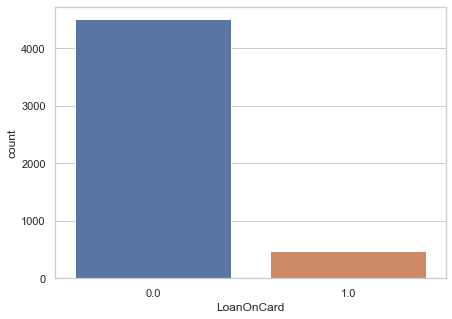

In [120]:
# Part B 2(A)
# Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.
# Solution
ax = plt.subplots(figsize=(7,5))   
sns.countplot(Data_New.LoanOnCard,label="Count")

<AxesSubplot:ylabel='Density'>

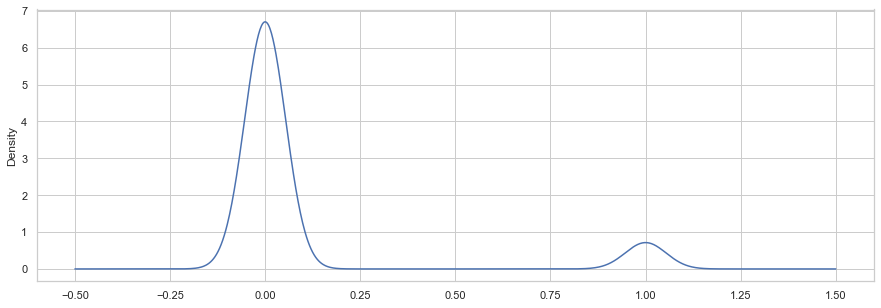

In [121]:
ax = plt.subplots(figsize=(15,5)) 
Data_New.LoanOnCard.plot(kind='density') 

In [122]:
# Observation 
# Majority of the bank customers (90%) do not have a loan on credit card.   
# The distribution of the 1s (customers with loan on credit card) and 0s (customers with no loan on credit card) are symmetric(Gaussian).

In [123]:
# Part B 2(B)
# Check the percentage of missing values and impute if required.

In [124]:
# Solution
# The total number of Loan on Card count is 
Data_New.LoanOnCard.count()

4980

In [125]:
# Total number of counts in terms of ID is 
Data_New.ID.count()

5000

In [126]:
# Missing values
5000-4980

20

In [127]:
# Percentage of missing values
20/5000 

0.004

In [128]:
# As the proportion of missing values in the LoanOnCard series is a trivial 0.40%, we will remove those rows 
Data_New.dropna(subset=['LoanOnCard'], inplace=True) 

In [129]:
Data_New.shape 

(4980, 14)

In [130]:
# Part B 2(C)
# Check for unexpected values in each categorical variable and impute with best suitable value 
# Solution
# There are no unexpected values in the categrical variables like ‘?’, ‘a’, 1.5  

In [131]:
# Part B 3(A)
#  Split data into X and Y
# Since we have already used X and Y in the previous example (in the same file), we will use A and B in lieu of X and Y respectively
# A: Independent variable, B: Dependent variable 
A = Data_New.drop(['ID',"ZipCode","LoanOnCard"],axis=1)     
B = Data_New["LoanOnCard"]   

In [132]:
# Part B 3(B)  
# Split data into train and test. Keep 25% data reserved for testing.
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.25, random_state=1) 

In [133]:
# Part B 3(C)
# Train a Supervised Learning Classification base model - Logistic Regression 
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(A_train, B_train)
#predict on test
B_predict = model.predict(A_test)
coef_df = pd.DataFrame(model.coef_)  
coef_df['intercept'] = model.intercept_
print(coef_df)    

          0         1         2        3         4         5         6  \
0 -0.413579  0.414053  0.050479  0.57838  0.115496  1.714343  0.000397   

          7         8         9        10  intercept  
0 -0.672523  3.225719 -0.595734 -0.846696  -2.144569  


In [134]:
B_predict 

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
# Part B 3(D)
# Print evaluation metrics for the model and clearly share insights
model_score = model.score(A_test, B_test)
print(model_score) 

0.9477911646586346


<AxesSubplot:>

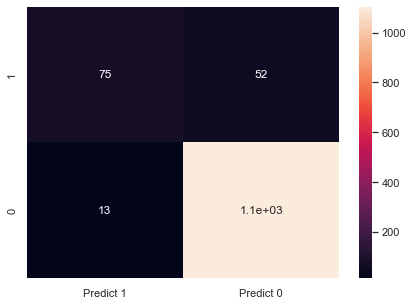

In [136]:
cm2 = metrics.confusion_matrix(B_test, B_predict, labels=[1, 0])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True)   

In [137]:
# Insights based on confusion matrix
# True Positives (TP): We correctly predicted that the customer has a loan on credit card 75 times 
# True Negatives (TN): We correctly predicted that the customer does not have a loan on credit card 1.1e+03 times 
# False Positives (FP): We incorrectly predicted that the customer has a loan on credit card 13 times (Type I error)
# False Negatives (FN): We incorrectly predicted that the customer does not have a loan on credit card 52 times (Type II error)

In [138]:
df_table = metrics.confusion_matrix(B_test, B_predict, labels=[1, 0])
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.95
precision:  0.96
recall   :  0.99
F1 score :  0.97


In [139]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 
mse = mean_squared_error(B_test, B_predict)
rms = sqrt(mse)
r2Score = r2_score(B_test, B_predict)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score)) 

The Root Mean Sq Error is 0.2284925279770992 and R^2 error is 0.43004944149423197


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

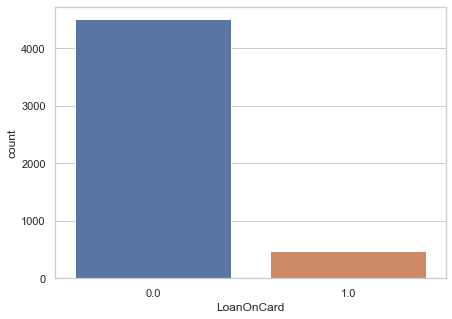

In [140]:
# Part B 3(E)
# Balance the data using the right balancing technique
# Distribution of the target variable
ax = plt.subplots(figsize=(7,5))   
sns.countplot(Data_New.LoanOnCard,label="Count")

In [141]:
Data_New.LoanOnCard.count()

4980

In [142]:
def CountFrequency(my_list):
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% d : % d"%(key, value))
 
# Driver function
if __name__ == "__main__":
    my_list = Data_New.LoanOnCard
    CountFrequency(my_list)

 1 :  480
 0 :  4500


In [143]:
# Class 1  
480/4980

0.0963855421686747

In [144]:
# Class 0
4500/4980

0.9036144578313253

In [145]:
# Proportion of CLass 0 in the target variable "LoanOnCard" is 90.36% 
# Proportion of CLass 1 in the target variable "LoanOnCard" is 9.64% 

In [146]:
# Balance the target variable as 50:50.
# Random selection of samples from the population without replacment 
# Proportion of target variable's (LoanOnCard) class 1s and 0s becomes 50:50 
# As population size of class 1s is 480, the sample size cannot be more than 480
# Class 1s and 0s of 'LoanOnCard' in equal proportions 
Data_New_1 = Data_New.groupby('LoanOnCard', group_keys=False).apply(lambda x: x.sample(480))

In [147]:
def CountFrequency(my_list):
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% d : % d"%(key, value))
 
# Driver function
if __name__ == "__main__":
    my_list = Data_New_1.LoanOnCard
    CountFrequency(my_list)

 0 :  480
 1 :  480


In [148]:
Data_New_1.shape

(960, 14)

In [149]:
# Part B 3(F)
# Train the same previous model on balanced data
A1 = Data_New_1.drop(['ID',"ZipCode","LoanOnCard"],axis=1)    
B1 = Data_New_1["LoanOnCard"] 

In [150]:
# Split data into train and test. Keep 25% data reserved for testing.
A_train_1, A_test_1, B_train_1, B_test_1 = train_test_split(A1,B1, test_size=0.25, random_state=1) 

In [151]:
# Train a Supervised Learning Classification base model - Logistic Regression 
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(A_train_1, B_train_1)
#predict on test
B_predict_1 = model.predict(A_test_1)
coef_df = pd.DataFrame(model.coef_)  
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.408557  0.418048  0.054424  0.649766  0.188432  1.542111 -0.000967   

          7         8         9        10  intercept  
0 -0.495759  3.268157 -0.344712 -0.498293  -0.918261  


In [152]:
# Part B 3(G)
# Print evaluation metrics and clearly share differences observed
model_score_1 = model.score(A_test_1, B_test_1)
print(model_score_1)

0.8458333333333333


<AxesSubplot:>

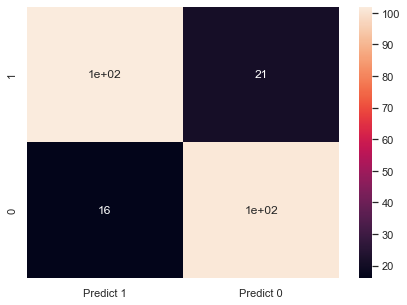

In [153]:
cm3 = metrics.confusion_matrix(B_test_1, B_predict_1, labels=[1, 0])
df_cm3 = pd.DataFrame(cm3, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True)

In [152]:
# Insights based on confusion matrix
# True Positives (TP): We correctly predicted that the customer has a loan on credit card 1.1e+02 times 
# True Negatives (TN): We correctly predicted that the customer does not have a loan on credit card 1.1e+02 times
# False Positives (FP): We incorrectly predicted that the customer has a loan on credit card 16 times (Type I error)
# False Negatives (FN): We incorrectly predicted that the customer does not have a loan on credit card 21 times (Type II error)

In [154]:
df_table_1 = metrics.confusion_matrix(B_test_1, B_predict_1, labels=[1, 0])
a = (df_table_1[0,0] + df_table_1[1,1]) / (df_table_1[0,0] + df_table_1[0,1] + df_table_1[1,0] + df_table_1[1,1])
p = df_table_1[1,1] / (df_table_1[1,1] + df_table_1[0,1])
r = df_table_1[1,1] / (df_table_1[1,1] + df_table_1[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.85
precision:  0.83
recall   :  0.86
F1 score :  0.85


In [156]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 
mse = mean_squared_error(B_test_1, B_predict_1)
rms = sqrt(mse)
r2Score = r2_score(B_test_1, B_predict_1)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score)) 

The Root Mean Sq Error is 0.39264063297965823 and R^2 error is 0.3829476756306025


In [157]:
# Comparison 
# Initial model
# accuracy :  0.95
# precision:  0.96
# recall   :  0.99
# F1 score :  0.97
    
# Balance model
# accuracy :  0.85
# precision:  0.83
# recall   :  0.86
# F1 score :  0.85

# ALl evaluation parameters decreased in value in the Balance model 

# Initial model
# The Root Mean Sq Error is 0.2284925279770992 and R^2 error is 0.43004944149423197
# Part B 3(E)
# Balance model
# The Root Mean Sq Error is 0.39264063297965823 and R^2 error is 0.3829476756306025

In [158]:
# Part B 4(A)
# Train a base model each for SVM, KNN
# Dataset is the balanced datset with Class 0s and 1s of target variable "LoanOnCard" in the ratio 50:50

In [159]:
# Data 
A1 = Data_New_1.drop(['ID',"ZipCode","LoanOnCard"],axis=1)    
B1 = Data_New_1["LoanOnCard"]   
# Split data into train and test. Keep 25% data reserved for testing.
# A_train_2, A_test_2, B_train_2, B_test_2 variables are introduced for SVC so as to avoid duplication in classification report
A_train_2, A_test_2, B_train_2, B_test_2 = train_test_split(A1,B1, test_size=0.25, random_state=1) 

In [160]:
# Solution 
# Train a base Support Vector Machine Model 
from sklearn.svm import SVC
svc = SVC() 
svc.fit(A_train_2, B_train_2) 
print("Accuracy on training set: {:.2f}".format(svc.score(A_train_2, B_train_2)))
print("Accuracy on test set: {:.2f}".format(svc.score(A_test_2, B_test_2))) 

Accuracy on training set: 0.87
Accuracy on test set: 0.87


In [161]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [162]:
# Data 
A1 = Data_New_1.drop(['ID',"ZipCode","LoanOnCard"],axis=1)    
B1 = Data_New_1["LoanOnCard"]   
# Split data into train and test. Keep 25% data reserved for testing.
# A_train_3, A_test_3, B_train_3, B_test_3 variables are introduced for KNN so as to avoid duplication in classification report
A_train_3, A_test_3, B_train_3, B_test_3 = train_test_split(A1,B1, test_size=0.25, random_state=1) 

In [163]:
# Train a base KNN Model 
# Instantiate learning model (k = 1)
knn_1 = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
# Fitting the model
knn_1.fit(A_train_3, B_train_3)
# predict the response
B_predict_3 = knn_1.predict(A_test_3)
# evaluate accuracy
print(accuracy_score(B_test_3, B_predict_3)) 

0.8291666666666667


In [164]:
# Part B 4(B)
# Tune parameters for each of the models wherever required and finalize a model. 

In [166]:
# Solution 
# Tuning hyperparameters of the KNN model 
# Cross validation 
# Creating the list of K for KNN
myList = list(range(1,101))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....100
for k in neighbors:
    knn_K = KNeighborsClassifier(n_neighbors=k)
    knn_K.fit(A_train_3, B_train_3)
    # predict the response
    B_predict_3 = knn_K.predict(A_test_3)
    # evaluate accuracy
    scores = accuracy_score(B_test_3, B_predict_3)
    ac_scores.append(scores)
# misclassification error
MSE = [1 - x for x in ac_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 39


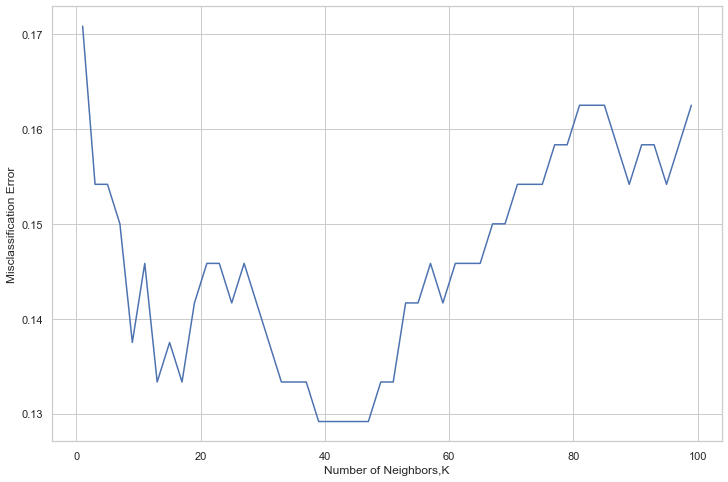

In [167]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors,K')
plt.ylabel('Misclassification Error')
plt.show()

In [168]:
# Tuning hyperparameters of the SVC model  
# Cross validation 
# Here, we use a meta-estimator called GridSearchCV.It implements a “fit” and a “score” method.
# The parameters of the meta-estimator are optimized by cross-validated grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
 
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(A_train_2, B_train_2)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.771 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [169]:
# Part B 4(C)
# Print evaluation metrics for final model. 

In [170]:
# Optimum KNN model 
# Instantiate learning model (k = 39)
knn_39 = KNeighborsClassifier(n_neighbors = 39, weights = 'distance')
# Fitting the model 
knn_39.fit(A_train_3, B_train_3)
# predict the response
B_predict_3 = knn_39.predict(A_test_3)
# evaluate accuracy
print(accuracy_score(B_test_3, B_predict_3))

0.8708333333333333


<AxesSubplot:>

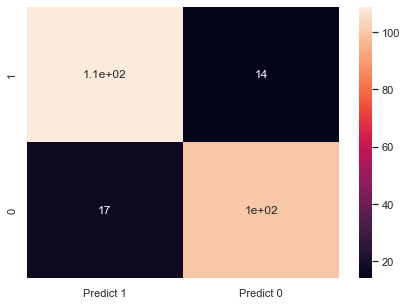

In [171]:
cm4 = metrics.confusion_matrix(B_test_3, B_predict_3, labels=[1, 0])
df_cm4 = pd.DataFrame(cm4, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4, annot=True)

In [172]:
df_table_3 = metrics.confusion_matrix(B_test_3, B_predict_3, labels=[1, 0])
a = (df_table_3[0,0] + df_table_3[1,1]) / (df_table_3[0,0] + df_table_3[0,1] + df_table_3[1,0] + df_table_3[1,1])
p = df_table_3[1,1] / (df_table_3[1,1] + df_table_3[0,1])
r = df_table_3[1,1] / (df_table_3[1,1] + df_table_3[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.87
precision:  0.88
recall   :  0.85
F1 score :  0.87


In [173]:
# Optimum SVC model  
from sklearn.svm import SVC  
svc2 = SVC(C=1000,gamma=0.0001,kernel='rbf')
svc2.fit(A_train_2, B_train_2)
print("Accuracy on training set: {:.2f}".format(svc2.score(A_train_2, B_train_2)))
print("Accuracy on test set: {:.2f}".format(svc2.score(A_test_2, B_test_2)))

Accuracy on training set: 0.96
Accuracy on test set: 0.91


In [174]:
grid_predictions = grid.predict(A_test_2)

# print classification report
print(classification_report(B_test_2, grid_predictions))/

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       117
         1.0       0.95      0.87      0.91       123

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



In [175]:
# Observations (Data: Balanced data with 0s and 1s in the target variable in the ratio of 50:50) 
# Logistic Regression model 
# accuracy :  0.85
# precision:  0.83
# recall   :  0.86
# F1 score :  0.85

# Optimum KNN model (k = 15)
# Accuracy :  0.87
# precision:  0.88
# recall   :  0.85
# F1 score :  0.87

# Optimum Support Vector Machine Model (C=1000,gamma=0.0001,kernel='rbf')
# accuracy :  0.91
# precision:  0.87 (taking the lower of 0s and 1s)
# recall   :  0.87 (taking the lower of 0s and 1s)
# F1 score :  0.91

# Based  on accuracy and F1 score,Support Vector Machine Model (C=1000,gamma=0.0001,kernel='rbf') is the best of the three models

In [176]:
# Part B 4(D)
# Share improvement achieved from base model to final model.
# Solution 
# Base KNN model
# Instantiate learning model (k = 1)
knn_1 = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
# Fitting the model
knn_1.fit(A_train_3, B_train_3)
# predict the response
B_predict_3 = knn_1.predict(A_test_3)
# evaluate accuracy
print(accuracy_score(B_test_3, B_predict_3)) 

0.8291666666666667


In [177]:
# Optimum KNN model 
# Instantiate learning model (k = 39)
knn_39 = KNeighborsClassifier(n_neighbors = 39, weights = 'distance')
# Fitting the model 
knn_39.fit(A_train_3, B_train_3)
# predict the response
B_predict_3 = knn_39.predict(A_test_3)
# evaluate accuracy
print(accuracy_score(B_test_3, B_predict_3))

0.8708333333333333


In [178]:
# Accuracy score improved by 4% (87%-83%) from base to final KNN model  

In [179]:
# Base Support Vector Machine Model 
from sklearn.svm import SVC
svc = SVC() 
svc.fit(A_train_2, B_train_2) 
print("Accuracy on test set: {:.2f}".format(svc.score(A_test_2, B_test_2))) 

Accuracy on test set: 0.87


In [180]:
# Optimum SVC model  
from sklearn.svm import SVC  
svc2 = SVC(C=1000,gamma=0.0001,kernel='rbf')
svc2.fit(A_train_2, B_train_2)
print("Accuracy on test set: {:.2f}".format(svc2.score(A_test_2, B_test_2)))

Accuracy on test set: 0.91


In [184]:
# Accuracy score improved by 4% (91%-87%) from base to final SVM model